# MCTS-backed Self-Play of Various Networks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

In [3]:
BOARD_SIZE=15

---

# The very first ResNet Model

In [26]:
from aegomoku.interfaces import PolicyAdviser, PolicyParams
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.gomoku_game import GomokuGame, ConstantBoardInitializer
from aegomoku.mcts import MCTS, MctsParams

cbi = ConstantBoardInitializer(stones='H8G7I7G9')
game = GomokuGame(board_size=BOARD_SIZE, initializer=cbi)
mcts_params = MctsParams(cpuct=4.0, num_simulations=100, temperature=0)
policy_params = PolicyParams(model_file_name=None, advice_cutoff=0.01)
model = tf.keras.models.load_model("models/first_model.model")
adviser = PolicyAdviser(model, policy_params)
mcts = MCTS(game, adviser, mcts_params)
board = GomokuBoard(BOARD_SIZE, cbi.initial_stones())

### Play

In [27]:
import numpy as np
from tqdm import tqdm

done = game.get_game_ended(board)

for episode_step in tqdm(range(50)):
    t = 1.0
    pi = mcts.get_action_prob(board, temperature=t)
    action = np.random.choice(len(pi), p=pi)

    board.act(action)
    done = game.get_game_ended(board)
    if done is not None:
        print("We have a winner!")
        break

  0%|          | 0/50 [00:02<?, ?it/s]

KeyboardInterrupt



In [ ]:
board.plot()

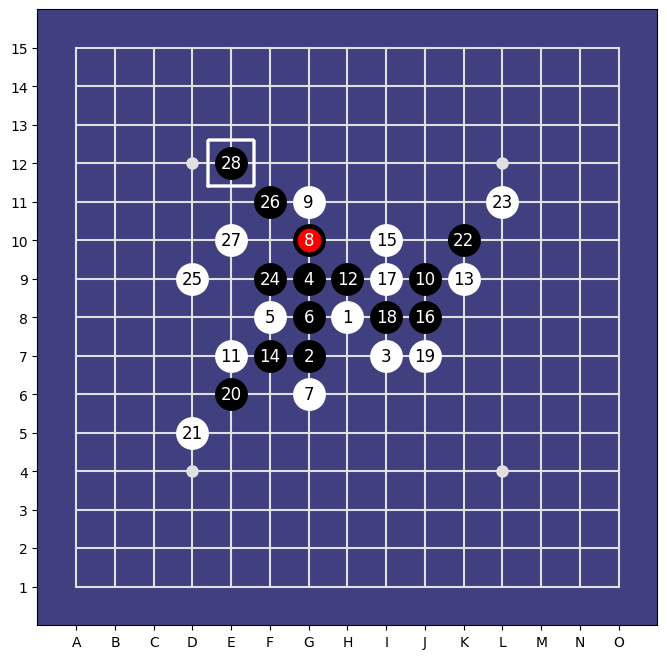

In [19]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board

heuristic = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
actions = [stone.i for stone in board.stones]
analyse_board(BOARD_SIZE, actions, policy=heuristic, disp_width=8)

### Watch the Game Continue

In [8]:
if not game.get_game_ended(board):
    pi = mcts.get_action_prob(board, temperature=.3)
    action = np.random.choice(len(pi), p=pi)
    board.act(action)
else:
    print("Game ended")

board.plot()

Game ended
                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  X  .  .  .  .  .  .  .  .    
12    .  .  .  .  X  .  .  .  .  X  .  .  .  .  .    
11    .  .  .  .  .  .  O  X  O  .  .  .  .  .  .    
10    .  .  .  X  O  X  O  O  O  O  X  .  .  .  .    
 9    .  .  .  .  X [O] O  O  O  O  X  .  .  .  .    
 8    .  .  .  .  .  O  X  X  .  .  .  X  .  .  .    
 7    .  .  .  .  X  .  O  .  X  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


---

# The Topological Value Policy

 56%|█████▌    | 28/50 [02:14<01:45,  4.79s/it]

We have a winner!


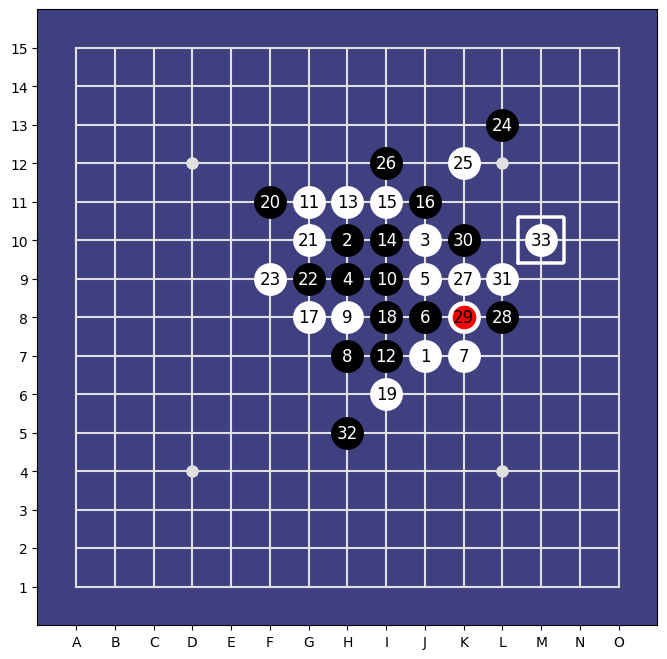

In [49]:
from aegomoku.gomoku_game import RandomBoardInitializer
import numpy as np
from tqdm import tqdm
from aegomoku.policies.topological_value import TopologicalValuePolicy
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board

# setup
cbi = RandomBoardInitializer(15, 4, 5, 9, 5, 9)
game = GomokuGame(board_size=BOARD_SIZE, initializer=cbi)
mcts_params = MctsParams(cpuct=4.0, num_simulations=400, temperature=0)
policy_params = PolicyParams(model_file_name=None, advice_cutoff=0.01)
adviser = TopologicalValuePolicy()
mcts = MCTS(game, adviser, mcts_params)
board = GomokuBoard(BOARD_SIZE, cbi.initial_stones())

done = game.get_game_ended(board)

# Play with two different temperatures
ti = [0, 0.4]
t = 0
for episode_step in tqdm(range(50)):
    t = 1 - t
    temp = ti[t]
    pi = mcts.get_action_prob(board, temperature=temp)
    action = np.random.choice(len(pi), p=pi)

    board.act(action)
    done = game.get_game_ended(board)
    if done is not None:
        print("We have a winner!")
        break

heuristic = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
actions = [stone.i for stone in board.stones]
analyse_board(BOARD_SIZE, actions, policy=heuristic, disp_width=8)